In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('Breast_Cancer.csv')
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
data.shape

(4024, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [6]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

<Axes: xlabel='Status', ylabel='count'>

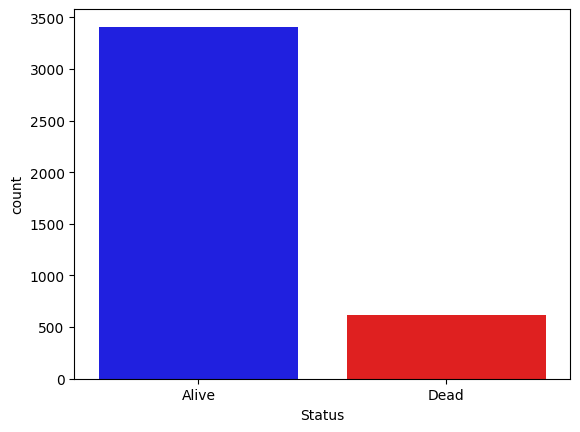

In [7]:
sns.countplot(x='Status',data=data,palette=['b','r'])

In [8]:
data.Status.value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [9]:
num_data=data.select_dtypes(exclude='object')
obj_data=data.select_dtypes(include='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
la=LabelEncoder()

In [12]:
for i in range (0,obj_data.shape[1]):
    obj_data.iloc[:,i]=la.fit_transform(obj_data.iloc[:,i])

In [13]:
obj_data=obj_data.astype('int')

In [14]:
obj_data.head(3)

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,2,1,0,0,0,1,3,1,1,1,0
1,2,1,1,1,2,0,2,1,1,1,0
2,2,0,2,2,4,0,2,1,1,1,0


In [23]:
data=pd.concat([obj_data,num_data],axis=1)
data

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,2,1,0,0,0,1,3,1,1,1,0,68,4,24,1,60
1,2,1,1,1,2,0,2,1,1,1,0,50,35,14,5,62
2,2,0,2,2,4,0,2,1,1,1,0,58,63,14,7,75
3,2,1,0,0,0,1,3,1,1,1,0,58,18,2,1,84
4,2,1,1,0,1,1,3,1,1,1,0,47,41,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,1,1,0,0,0,0,2,1,1,1,0,62,9,1,1,49
4020,2,0,1,1,2,0,2,1,1,1,0,56,46,14,8,69
4021,2,1,1,0,1,0,2,1,1,0,0,68,22,11,3,69
4022,0,0,1,0,1,0,2,1,1,1,0,58,44,11,1,72


In [24]:
x=data.drop('Status',axis='columns')
y=data['Status']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=21)

In [35]:
model2=RandomForestClassifier()

In [36]:
def pred(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print(classification_report(y_test,pre))

In [37]:
pred(model2)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       341
           1       0.84      0.66      0.74        62

    accuracy                           0.93       403
   macro avg       0.89      0.82      0.85       403
weighted avg       0.92      0.93      0.92       403



In [38]:
import joblib

# Save model to a specific file path
def save_model(model, path):
    joblib.dump(model, path)

# Example usage
save_path = 'C://Users/nithi/jupyter-files/Path/Collection-RFT/BreastCancer.joblib'
save_model(model2, save_path)

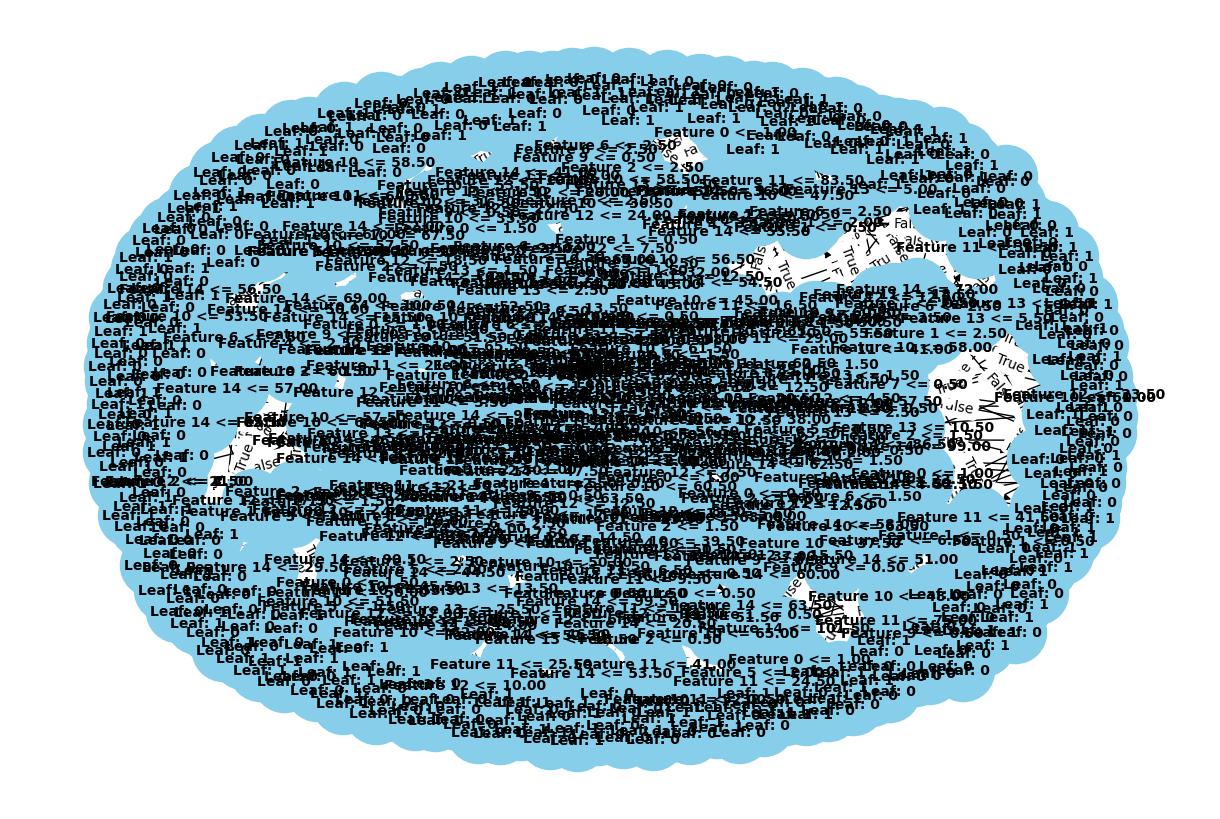

In [22]:
import networkx as nx
from sklearn.tree import _tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Function to convert a decision tree into a networkx graph
def tree_to_networkx(tree, feature_names):
    graph = nx.DiGraph()  # Directed graph
    
    def recurse(node, parent=None, depth=0, label=None):
        # If the node is a leaf node
        if tree.tree_.children_left[node] == _tree.TREE_LEAF:
            graph.add_node(node, label=f"Leaf: {tree.tree_.value[node].argmax()}")
            if parent is not None:
                graph.add_edge(parent, node, label=label)
        else:
            # Non-leaf node
            feature_index = tree.tree_.feature[node]
            threshold = tree.tree_.threshold[node]
            graph.add_node(node, label=f"{feature_names[feature_index]} <= {threshold:.2f}")
            
            if parent is not None:
                graph.add_edge(parent, node, label=label)
            
            # Recursively add children
            recurse(tree.tree_.children_left[node], node, depth + 1, "True")
            recurse(tree.tree_.children_right[node], node, depth + 1, "False")
    
    recurse(0)  # Start recursion from the root node
    return graph

# Extract feature names directly from the model
def get_feature_names_from_model(model):
    return [f"Feature {i}" for i in range(model.n_features_in_)]

# Convert the decision tree to networkx graph
single_tree = model2.estimators_[0]  # Extract one tree from the RandomForestClassifier
feature_names = get_feature_names_from_model(model2)  # Get feature names from the model

# Convert the tree to a graph
graph = tree_to_networkx(single_tree, feature_names)

# Plot the graph
pos = nx.spring_layout(graph)
labels = nx.get_node_attributes(graph, 'label')
edge_labels = nx.get_edge_attributes(graph, 'label')

plt.figure(figsize=(12, 8))
nx.draw(graph, pos, with_labels=True, labels=labels, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.show()